In [28]:
from mmengine import Config
import torch
from matplotlib import pyplot as plt
import numpy as np
import os
import torchvision
from models.gan import Generator

In [30]:
ckp_root = '07-12-24/17:14:31-[gan]-[flower]'
config = Config.fromfile(os.path.join(ckp_root, 'config.py'))
ckp = torch.load(os.path.join(ckp_root, 'last.ckpt'))

In [31]:
model = Generator(**config.model_config.gen_config)
sd = ckp['state_dict'] 
sd = {k[4:]: v for k, v in sd.items() if 'gen' in k}
model.load_state_dict(sd)

<All keys matched successfully>

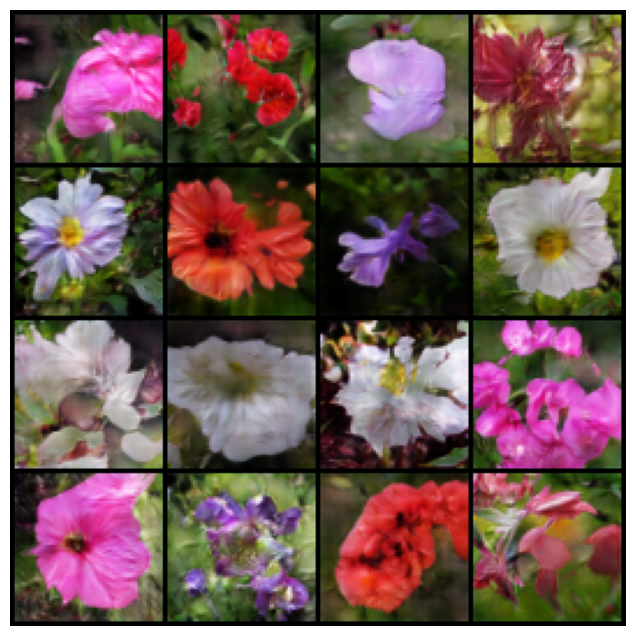

In [32]:
laten_dim = config.model_config.gen_config.channels_noise
noise = torch.randn(16, laten_dim, 1, 1)
with torch.no_grad():
    sampled = model(noise)
    img = torchvision.utils.make_grid(sampled, nrow=4, padding=2, normalize=True)
    fig = plt.figure(figsize=(8, 8))
    plt.imshow(img.permute(1, 2, 0).detach().numpy())
    plt.axis('off')
    plt.show()